In [2]:
import pandas as pd 
import numpy as np 
import pandas as pd
import matplotlib as mpl 
from matplotlib import pyplot as plt
import sys 
sys.path.append('../../modules/')
import matplotlib_config as mconf
colorI, colorII, colorIII = mconf.set_standard_layout()

#### Notebook generating bluprint for figure 5 in supplementary S8

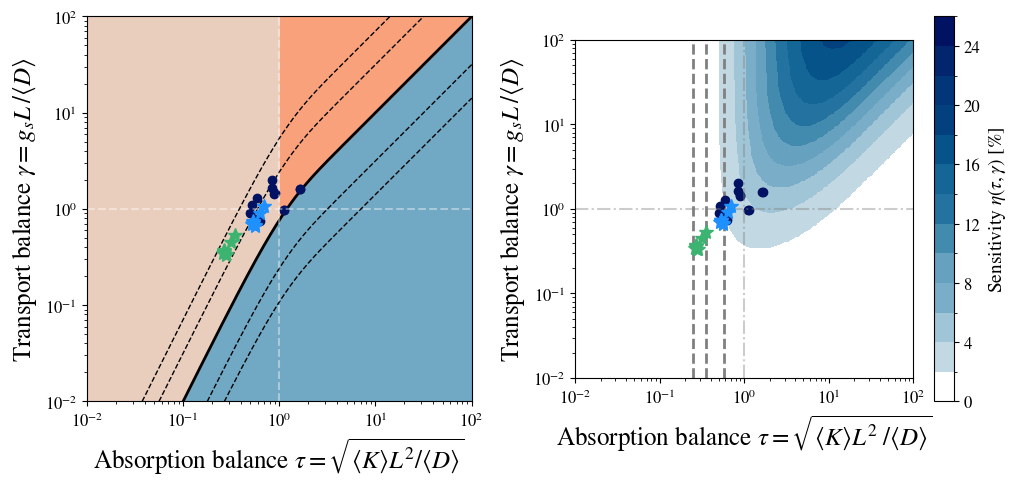

In [3]:
# load data for amphistomatous correction visualization
df = pd.read_csv('../../data/saved_data/Knauer2022_most_ias_limited.csv', sep=';', decimal=',')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# ax1 for 2D zoom and ax2 for 3C zoom
chi_ = 0.1
xmin, xmax = 0.01, 100
taus = np.exp(np.linspace(np.log(xmin), np.log(xmax), 400))
borders = lambda taus, sigma: sigma*taus*np.tanh(taus)

# shading
ax1.fill_between(taus, borders(taus, 1), xmin, color=colorI)
ax1.fill_between(taus[taus <= 1], xmax, borders(taus[taus <= 1], 1), color=colorII)
ax1.fill_between(taus[taus >= 1], xmax, borders(taus[taus >= 1], 1), color=colorIII)
# lines
ax1.plot(taus, borders(taus, 1), color='black', linestyle='-', linewidth=2)
ax1.plot(taus, borders(taus, np.sqrt(50)), color='black', linestyle='--', linewidth=1)
ax1.plot(taus, borders(taus, np.sqrt(10)), color='black', linestyle='--', linewidth=1)
ax1.plot(taus, borders(taus, 1/np.sqrt(10)), color='black', linestyle='--', linewidth=1)
ax1.plot(taus, borders(taus, 1/np.sqrt(50)), color='black', linestyle='--', linewidth=1)

# plot the data 
hypo_color = mconf.hex2rgb('001261')
amphi_color = 'dodgerblue'

for i in df.index.tolist():
    if df.loc[i, 'hypostomatous'] == 'yes':
        ax1.plot(df.loc[i, 'tau'], df.loc[i, 'gamma'], 'o', color=hypo_color, markersize=6)
    else:
        ax1.plot(df.loc[i, 'tau'], df.loc[i, 'gamma'], '*', color=amphi_color, markersize=10, zorder=3)
        ax1.plot(df.loc[i, 'tau']/2, df.loc[i, 'gamma']/2, '*', color='mediumseagreen', markersize=10, zorder=3)


ax1.set_xlabel(r'Absorption balance $\tau = \sqrt{\langle K \rangle L^2 / \langle D \rangle}$', fontsize=18)
ax1.set_ylabel(r'Transport balance $\gamma = g_s L \;/ \langle D \rangle$', fontsize=18)
ax1.plot([1, 1], [xmin, xmax], color='white', linestyle='--', alpha=0.4)
ax1.plot([xmin, xmax], [1, 1],  color='white', linestyle='--', alpha=0.4)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(xmin, xmax)
ax1.set_aspect('equal')

#___________________________________________________________-

sensitivity = 100*np.loadtxt('../../data/saved_data/sensitivities.txt', delimiter=';', skiprows=1)
bounds = (0, 26, 14)
N = len(sensitivity)
taus   = np.exp(np.linspace(np.log(0.01), np.log(100), N))
gammas = np.exp(np.linspace(np.log(0.01), np.log(100), N))


cmap, norm = mconf.my_cmap(*bounds)
im = plt.pcolor(taus, gammas, sensitivity, shading='nearest', cmap=cmap, norm=norm)
cbar = plt.colorbar(im)

lines = [0.248, 0.352, 0.570] #1%, 2%, 5%, relative error
for line in lines:
    ax2.vlines(line, 0.01, 100, color='grey', linestyle='--', linewidth=2)

for i in df.index.tolist():
    if df.loc[i, 'hypostomatous'] == 'yes':
        ax2.plot(df.loc[i, 'tau'], df.loc[i, 'gamma'], 'o', color=hypo_color, markersize=6)
    else:
        ax2.plot(df.loc[i, 'tau'], df.loc[i, 'gamma'], '*', color=amphi_color, markersize=10, zorder=3)
        ax2.plot(df.loc[i, 'tau']/2, df.loc[i, 'gamma']/2, '*', color='mediumseagreen', markersize=10, zorder=3)

#
cbar.set_label(r'Sensitivity $\eta(\tau, \gamma)$ [%]')
ax2.set_xlabel(r'Absorption balance $\tau = \sqrt{\langle K \rangle L^2 \; / \langle D\rangle}$', fontsize=18)
ax2.set_ylabel(r'Transport balance $\gamma = g_s L \;/ \langle D \rangle$', fontsize=18)
ax2.plot([1, 1], [xmin, xmax], color='grey', linestyle='-.', alpha=0.4)
ax2.plot([xmin, xmax], [1, 1],  color='grey', linestyle='-.', alpha=0.4)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(xmin, xmax)
ax2.set_aspect('equal')
# plt.savefig('../vectorgraphics/figure5_S8.svg')
plt.show()
